In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import gzip
from astropy.io import fits
from scipy.interpolate import interp1d
from scipy.optimize import minimize
import pickle as pkl
from numpy import math
import traceback
import sys
from scipy import interpolate

from tqdm import tqdm
from scipy.interpolate import InterpolatedUnivariateSpline

from matplotlib.ticker import AutoMinorLocator
import os

cmd_folder = os.path.realpath(os.getenv("SESNCFAlib"))

if cmd_folder not in sys.path:
     sys.path.insert(0, cmd_folder)
        
cmd_folder = '/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl_output/'

if cmd_folder not in sys.path:
     sys.path.insert(0, cmd_folder)
        
import templutils as templutils
import snclasses as snstuff

%matplotlib inline

In [44]:
lc_direc = os.getenv("SESNPATH") + './../Somayeh_contributions/main/ELASTICC_lc/'

SNTYPES = ['Ib','IIb','Ic','Ic-bl', 'Ibn']

bands = ['R','V','r','g','U','u','J','B','H','I','i','K','m2','w1','w2']
colorTypes = {'IIb':'FireBrick',
             'Ib':'SteelBlue',
             'Ic':'DarkGreen',
             'Ic-bl':'DarkOrange',
             'Ibn':'purple'}

In [45]:
# Reading in GP templates in any bands requested

tmpl = {}

bands2 = ['u','r', 'i']

for bb in bands:
    if bb in bands2:
        bb += 'p'

    tmpl[bb[0]] = {}

    for SNTYPE in SNTYPES:
        

        path = os.getenv("SESNPATH") + "maketemplates/outputs/GP_template_files/GPalltemplfit_%s_%s_V0.pkl"%(SNTYPE,bb)
        if os.path.isfile(path):
            tmpl_ = pkl.load(open(path, "rb"))
        else:
            print('No GP template for type %s in band %s'%(SNTYPE,bb))
            continue
        tmpl[bb[0]][SNTYPE] = {}
        
#         print(tmpl_['rollingMedian'])

        # if np.nansum(tmpl_['rollingMedian']) == 0:
        #     print(bb, SNTYPE)
        #     continue

        tmpl[bb[0]][SNTYPE] = tmpl_





No GP template for type Ibn in band U
No GP template for type Ic-bl in band up
No GP template for type Ibn in band up
No GP template for type Ibn in band J
No GP template for type Ibn in band H
No GP template for type IIb in band K
No GP template for type Ic-bl in band K
No GP template for type Ibn in band K
No GP template for type Ib in band m2
No GP template for type IIb in band m2
No GP template for type Ic in band m2
No GP template for type Ic-bl in band m2
No GP template for type Ibn in band m2
No GP template for type Ic in band w1
No GP template for type Ic-bl in band w1
No GP template for type Ibn in band w1
No GP template for type Ib in band w2
No GP template for type IIb in band w2
No GP template for type Ic in band w2
No GP template for type Ic-bl in band w2
No GP template for type Ibn in band w2


In [46]:
bands = ['u', 'U', 'B', 
         'g', 'r', 'i', 
         'V', 'R', 'I', 
         'J', 'H', 'K',
         'w1', 'm2', 'w2']
templates = {}
for b in bands:

    templates[b] = {}

    path = os.getenv("SESNPATH") + "maketemplates/outputs/Ibc_template_files/UberTemplate_%s.pkl" %\
                                    (b + 'p' if b in ['u', 'r', 'i'] else b)
    templates_ = pkl.load(open(path, "rb"))

    templates[b] = templates_

    if np.nansum(templates_['med_smoothed']) == 0:
        print(b + ' band has no Ibc templates.')
        continue

/var/folders/6f/k2kn3hn52ws4kc_w0_zqfpy40000gp/T/ipykernel_19154/3930791728.py:13: DeprecationWarning: Please use `InterpolatedUnivariateSpline` from the `scipy.interpolate` namespace, the `scipy.interpolate.fitpack2` namespace is deprecated.
  templates_ = pkl.load(open(path, "rb"))


In [47]:
sn_name = 'sn1994I'
b = 'V'

In [48]:
thissn = snstuff.mysn(sn_name, addlit=True)

SN name short: 94I



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/phot/slc.sn94I.f']


#######NIR#######

No CfA NIR files


In [49]:
lc, flux, dflux, snname = thissn.loadsn2(verbose=False)
thissn.setphot()
thissn.getphot(verbose=False)
thissn.setphase(verbose=False)
thissn.sortlc()
input_file, snn = thissn.readinfofileall(verbose=False)

0
reading small file
Vmax 2449451.9


/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/SESNCFAlib/snclasses.py:5324: UserWarning: loadtxt: input contained no data: "/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/SNe_templates/GPSNtempl/literaturedata/nirphot/94I.dat"
  self.nirlc = np.loadtxt(f, usecols=(0, 1, 2, 3), \


In [50]:
thissn.type

'Ic'

In [99]:
idx = np.lexsort([x, y])
out = np.sort(idx[np.unique(x[idx], return_index=1)[1]])

In [105]:
y[out]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan], dtype=float32)

In [103]:
out
len(np.unique(y[out]))

1

In [104]:
len(y[out])

94

1.427827182914374


Text(0.45, 0.95, 'Distance from template= 0 to 4 x IQR')

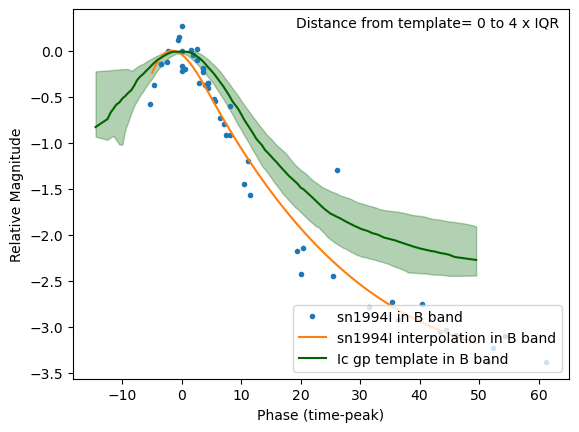

In [137]:
which_tmpl = 'gp'
b = 'B'
tp = 'Ic'

xmin = thissn.photometry[b]['mjd'].min()
x = thissn.photometry[b]['mjd']    
y = thissn.photometry[b]['mag']

yerr = thissn.photometry[b]['dmag']
x = x - x[np.argmin(y)]
# y = np.min(y)-y

idx = np.lexsort([x, y])
out = np.sort(idx[np.unique(x[idx], return_index=1)[1]])
x = x[out]
y = y[out]

if which_tmpl == 'gp':
    # tmpl_chosen = 
    # print(tmpl[b][tp].keys())
    t = tmpl[b][tp]['t']
    tmpl_med = tmpl[b][tp]['rollingMedian']
    tmpl_med_up = tmpl[b][tp]['rollingPc75']
    tmpl_med_low = tmpl[b][tp]['rollingPc25']
    
    t2 = t[(t <= x.max()) * (t >= x.min())]
    u = interpolate.splrep(x, y, s=2.5)
    y2 = interpolate.splev(t2, u)
    
    y2_min = np.min(y2)
    y = y2_min - y
    # y = np.min(y)-y
    y2 = y2_min - y2
    
    IQR = np.abs(tmpl_med - tmpl_med_low)
    metric = np.abs(y2 - tmpl_med_low[(t <= x.max()) * (t >= x.min())])/IQR[(t <= x.max()) * (t >= x.min())]
    metric_min = np.nanmin(metric)
    metric_max = np.nanmax(metric)
    print(np.nanmean(metric))
    
    label_templ = '%s %s template in %s band'%(tp, which_tmpl, b)
    
elif which_tmpl=='Ibc':
    t = templates[b]['phs']
    tmpl_med = -1*templates[b]['med_smoothed']
    tmpl_med_up = -1*templates[b]['pc25_smoothed']
    tmpl_med_low = -1*templates[b]['pc75_smoothed']
    t2 = t[(t <= x.max()) * (t >= x.min())]
    u = interpolate.splrep(x, y, s=.5)
    y2 = interpolate.splev(t2, u)
    
    
    y2_min = np.nanmin(y2)
    y = y2_min - y
    y2 = y2_min - y2
    
    tmpl_med = tmpl_med - np.nanmax(tmpl_med)
    tmpl_med_up = tmpl_med_up - np.nanmax(tmpl_med)
    tmpl_med_low = tmpl_med_low - np.nanmax(tmpl_med)
    t = t - t[np.nanargmax(tmpl_med)]
    
    IQR = np.abs(tmpl_med - tmpl_med_low)
    metric = np.abs(y2 - tmpl_med_low[(t <= x.max()) * (t >= x.min())])/IQR[(t <= x.max()) * (t >= x.min())]
    metric_min = np.nanmin(metric)
    metric_max = np.nanmax(metric)
    
    label_templ = '%s template in %s band'%(which_tmpl, b)
    
plt.plot(x, y, '.', label=sn_name + ' in %s band'%b)
plt.plot(t2, y2, label=sn_name + ' interpolation in %s band'%b)
plt.plot(t, tmpl_med, color = colorTypes[tp], label=label_templ)
plt.fill_between(t, tmpl_med_low, tmpl_med_up, alpha=0.3, color = colorTypes[tp])
plt.legend(loc = 4)

plt.xlabel('Phase (time-peak)')
plt.ylabel('Relative Magnitude')
plt.text(0.45, 0.95, 'Distance from template= %i to %i x IQR'%(metric_min, metric_max), transform=plt.gca().transAxes)  

In [121]:
np.min(y)

12.57